# Homework

### Dataset

In this homework, we'll build a model for predicting if we have an image of a dino or a dragon. For this, we will use the "Dino or Dragon?" dataset that can be downloaded from [Kaggle](https://www.kaggle.com/datasets/agrigorev/dino-or-dragon). 

You can get a wget-able version [here](https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip):

```bash
wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip
unzip dino-dragon.zip
```

In the lectures we saw how to use a pre-trained neural network. In the homework, we'll train a much smaller model from scratch. 

**Note:** You will need an environment with a GPU for this homework. We recommend to use [Saturn Cloud](https://bit.ly/saturn-mlzoomcamp). 
You can also use a computer without a GPU (e.g. your laptop), but it will be slower.


### Data Preparation

The dataset contains around 1900 images of dinos and around 1900 images of dragons. 

The dataset contains separate folders for training and test sets. 


### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be `(150, 150, 3)`
* Next, create a convolutional layer ([`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/)):
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation 
* Reduce the size of the feature map with max pooling ([`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/))
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use [`SGD`](https://keras.io/api/optimizers/sgd/) with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`

For clarification about kernel size and max pooling, check [Office Hours](https://www.youtube.com/watch?v=1WRgdBTUaAc).

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_fp = './train/'
test_fp = './test/'

plt.style.use('ggplot')

---

### Model

In [3]:
model = models.Sequential()

model.add(
    layers.Conv2D(32, 
                  (3, 3), 
                  activation='relu',
                  input_shape=(150, 150, 3)
                  )
    )
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2022-11-21 16:55:52.085667: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-21 16:55:52.086071: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.SGD(
        learning_rate=0.002, 
        momentum=0.8
    ),
    metrics=['acc']
)

---

### Question 1

Since we have a binary classification problem, what is the best loss function for us?

- `binary crossentropy`
- `focal loss`
- `mean squared error`
- `categorical crossentropy`

Note: since we specify an activation for the output layer, we don't need to set `from_logits=True`

### Answer 1

`binary crossentropy`

---

What's the total number of parameters of the model? You can use the `summary` method for that. 

- 9215873
- **11215873**
- 14215873
- 19215873

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

---

### Generators and Training

For the next two questions, use the following data generator for both train and test sets:

```python
ImageDataGenerator(rescale=1./255)
```

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/val directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and test sets. 

For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```

---

### Question 3

What is the median of training accuracy for all the epochs for this model?

- 0.40
- 0.60
- **0.90**
- 0.20

In [7]:
train_data_generator = ImageDataGenerator(rescale=1./255)
val_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(
    train_fp,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 1594 images belonging to 2 classes.


In [8]:
validation_generator = val_data_generator.flow_from_directory(
    test_fp,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 394 images belonging to 2 classes.


In [9]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10


2022-11-21 17:02:02.713862: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-21 17:02:02.955897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


80/80 [==============================] - ETA: 0s - loss: 0.6990 - acc: 0.5094

2022-11-21 17:02:10.057145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


80/80 [==============================] - 8s 83ms/step - loss: 0.6990 - acc: 0.5094 - val_loss: 0.6829 - val_acc: 0.6548
Epoch 2/10
80/80 [==============================] - 6s 77ms/step - loss: 0.6651 - acc: 0.6575 - val_loss: 0.6402 - val_acc: 0.6294
Epoch 3/10
80/80 [==============================] - 6s 77ms/step - loss: 0.6050 - acc: 0.7026 - val_loss: 0.5397 - val_acc: 0.8122
Epoch 4/10
80/80 [==============================] - 6s 77ms/step - loss: 0.4960 - acc: 0.7898 - val_loss: 0.4668 - val_acc: 0.8096
Epoch 5/10
80/80 [==============================] - 6s 78ms/step - loss: 0.4242 - acc: 0.8093 - val_loss: 0.3987 - val_acc: 0.8401
Epoch 6/10
80/80 [==============================] - 6s 77ms/step - loss: 0.3772 - acc: 0.8494 - val_loss: 0.3674 - val_acc: 0.8274
Epoch 7/10
80/80 [==============================] - 6s 78ms/step - loss: 0.3272 - acc: 0.8726 - val_loss: 0.3440 - val_acc: 0.8426
Epoch 8/10
80/80 [==============================] - 6s 77ms/step - loss: 0.3041 - acc: 0.8821 

In [10]:
np.median(history.history['acc'])

0.8293600976467133

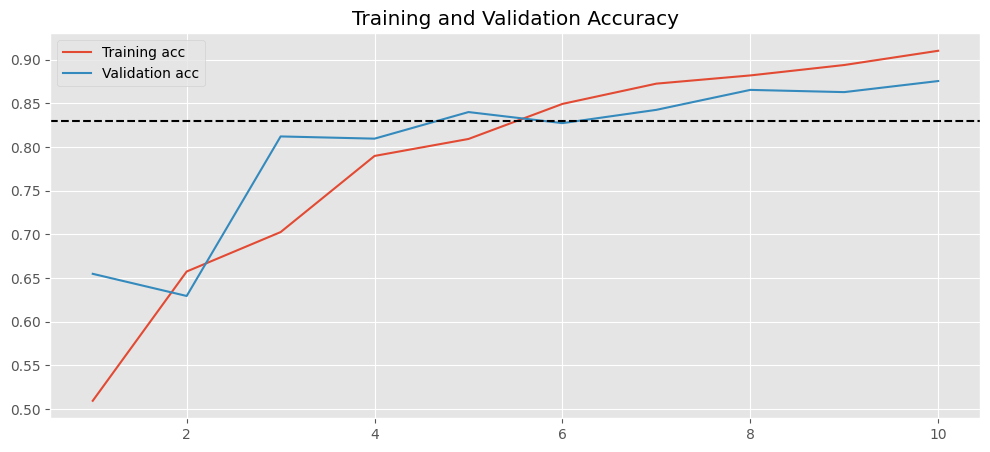

In [11]:
plt.figure(figsize=(12, 5))
plt.plot(
    range(1,len(history.history['acc'])+1), 
    history.history['acc'], 
    label='Training acc'
)
plt.plot(
    range(1,len(history.history['acc'])+1), 
    history.history['val_acc'], 
    label='Validation acc'
)
plt.axhline(
    y=np.median(history.history['acc']), 
    color='k', 
    linestyle='--'
    )

plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

---

### Question 4

What is the standard deviation of training loss for all the epochs for this model?

- **0.11**
- 0.66
- 0.99
- 0.33

In [12]:
np.std(history.history['loss'])

0.15727985794029165

---

### Data Augmentation

For the next two questions, we'll generate more data using data augmentations. 

Add the following augmentations to your training data generator:

* `rotation_range=40,`
* `width_shift_range=0.2,`
* `height_shift_range=0.2,`
* `shear_range=0.2,`
* `zoom_range=0.2,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`

---

### Question 5 

Let's train our model for 10 more epochs using the same code as previously.
Make sure you don't re-create the model - we want to continue training the model
we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

- 0.15
- 0.77
- **0.37**
- 0.97

In [13]:
train_data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_data_generator = ImageDataGenerator(rescale=1./255)

In [14]:
train_generator = train_data_generator.flow_from_directory(
    train_fp,
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='binary'
)

Found 1594 images belonging to 2 classes.


In [15]:
validation_generator = test_data_generator.flow_from_directory(
    test_fp,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 394 images belonging to 2 classes.


In [16]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
50/50 [==============================] - 9s 162ms/step - loss: 0.4625 - acc: 0.7836 - val_loss: 0.4056 - val_acc: 0.8020
Epoch 2/10
50/50 [==============================] - 8s 157ms/step - loss: 0.4387 - acc: 0.8011 - val_loss: 0.4917 - val_acc: 0.7640
Epoch 3/10
50/50 [==============================] - 8s 155ms/step - loss: 0.4252 - acc: 0.8055 - val_loss: 0.4438 - val_acc: 0.7893
Epoch 4/10
50/50 [==============================] - 8s 154ms/step - loss: 0.4312 - acc: 0.8087 - val_loss: 0.3734 - val_acc: 0.8274
Epoch 5/10
50/50 [==============================] - 8s 154ms/step - loss: 0.4138 - acc: 0.8093 - val_loss: 0.4008 - val_acc: 0.8122
Epoch 6/10
50/50 [==============================] - 8s 154ms/step - loss: 0.4003 - acc: 0.8262 - val_loss: 0.4203 - val_acc: 0.8096
Epoch 7/10
50/50 [==============================] - 8s 155ms/step - loss: 0.4116 - acc: 0.7999 - val_loss: 0.4841 - val_acc: 0.7766
Epoch 8/10
50/50 [==============================] - 8s 154ms/step - loss: 0.

In [17]:
np.mean(history.history['val_loss'])

0.41862603425979616

---

### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations?

- **0.84**
- 0.54
- 0.44
- 0.24

In [18]:
np.mean(history.history['val_acc'][-5:])

0.8192893147468567

---

## Submit the results

- Submit your results here: https://forms.gle/XdH5ztBddvTvxzpT6
- You can submit your solution multiple times. In this case, only the last submission will be used
- If your answer doesn't match options exactly, select the closest one


## Deadline

The deadline for submitting is 21 November 2022, 23:00 CEST.

After that, the form will be closed.

--- 

# Learning in Public

* https://twitter.com/David__Colton/status/1591760419714392064?s=20&t=tCW-IPHsCRYaeEZ3uLCGCw
* https://twitter.com/David__Colton/status/1591790353044197376?s=20&t=L3lLOoqrSHJ6GacqwbZNZA
* https://twitter.com/David__Colton/status/1591794596874715136?s=20&t=k1ksVLLScWtOJYF9TCEJfg
* https://twitter.com/David__Colton/status/1592648954457444352?s=20&t=o6ku8KtedaHt0xiH2c5faw
* https://twitter.com/David__Colton/status/1592807007983370240?s=20&t=iczl6WTNuOcxbk7qk2Etrw
* https://twitter.com/David__Colton/status/1594125809278914560?s=20&t=Eb6lYuAe2CTJ3aJ4mMtvhg
* https://twitter.com/David__Colton/status/1594125809278914560?s=20&t=Eb6lYuAe2CTJ3aJ4mMtvhg
* https://twitter.com/David__Colton/status/1594301509109366784?s=20&t=a3tZxY9xjDYCNDY-u5TbSg
* https://twitter.com/David__Colton/status/1594304549128396801?s=20&t=lZUohS_qX5Ln991DOAheKA
* https://twitter.com/David__Colton/status/1594325487119212545?s=20&t=b1pWzraX1UOmy1vqWBRHAw
* https://twitter.com/David__Colton/status/1594612964036050945?s=20&t=LThGDcxBe-Aye148Sq7X7w
* https://twitter.com/David__Colton/status/1594619087551926273?s=20&t=kfZYn3ouCo8FWNENSrpuDg
* https://twitter.com/David__Colton/status/1594622227730911233?s=20&t=idxgHVanIvGTVvXuuGAozQ
* https://twitter.com/David__Colton/status/1594680435753336833?s=20&t=ON7z61vPujVTWJ2y2T_Erwv
* https://twitter.com/David__Colton/status/1594682207930847238?s=20&t=ipaFy4EZNv66x7al50COWA